In [7]:
%pip install tensorflow
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import tensorflow.keras.optimizers 
from tensorflow.keras.models import Model
import numpy as np
import random

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)

In [9]:
Y_train ## what to normalize (uint8, 0,254 (255 values))

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)

In [10]:
X_train = X_train[0:2000] 
Y_train = Y_train[0:2000] 
X_test = X_test[0:500]
Y_test = Y_test[0:500]

## Normalize values
X_train, X_test = X_train / 255.0, X_test / 255.0 

## Load model
base_model = MobileNetV2(weights='imagenet', include_top=False)

## Freeze base layers
base_model.trainable = False

## Add classifiers
shape = tf.keras.Input(shape=(32,32,3)) ## there was no specified input shape, so i am reusing from the similar task
model_classifier = base_model(inputs=shape,training=False)
model_classifier = GlobalAveragePooling2D()(model_classifier)
model_classifier = Dense(units=128, activation='relu')(model_classifier)
model_classifier = Dropout(rate=0.2)(model_classifier)
outputs = Dense(units=10, activation='softmax')(model_classifier)

model = Model(inputs=shape, outputs=outputs)

adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=adam_optimizer,metrics=['accuracy'])
history = model.fit(X_train, Y_train,epochs=5, batch_size=32, validation_split=0.2)



/var/folders/5k/gs40h3sn72lf36hj0p6k_9b80000gn/T/ipykernel_53410/769051019.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1781 - loss: 2.2601 - val_accuracy: 0.2525 - val_loss: 2.2050
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2681 - loss: 2.1487 - val_accuracy: 0.3000 - val_loss: 2.1139
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2981 - loss: 2.0508 - val_accuracy: 0.2925 - val_loss: 2.0482
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3137 - loss: 1.9759 - val_accuracy: 0.2825 - val_loss: 2.0082
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3338 - loss: 1.9250 - val_accuracy: 0.2950 - val_loss: 1.9838


In [11]:
test_accuracy = model.evaluate(X_test, Y_test, batch_size=32)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2580 - loss: 2.0018


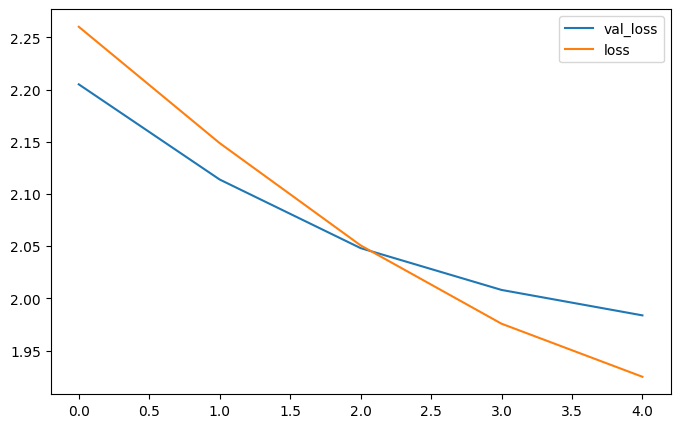

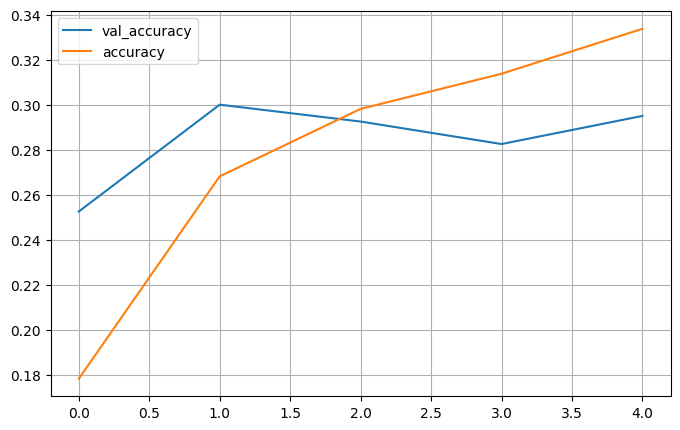

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.DataFrame(history.history)
dataframe[['val_loss', 'loss']].plot(figsize=(8,5))
dataframe[['val_accuracy', 'accuracy']].plot(figsize=(8,5))
plt.grid(True)
plt.show()